In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_predict=pd.read_csv("./graduate-admissions/Admission_Predict_Ver1.1.csv")

In [4]:
print('Data First 5 Rows\n')
data_predict.head()

Data First 5 Rows



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
print('Data Show Is NULL')
data_predict.isnull().sum()

Data Show Is NULL


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

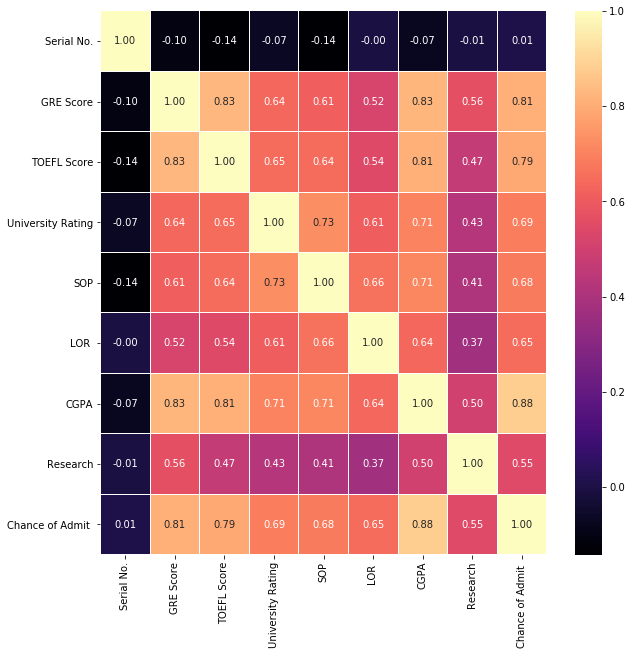

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_predict.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

The Chance of admit is highly co-related with GRE score, TOEFL Score and CGPA. The more the GRE score, TOEFL score and CGPA, the higher are the chances of getting an admission.

Similarly, You can see that University Rating Corelation is not highly co-related with CGPA. This is because as the university rating increases, there are other factors that play role into getting an admission.
Here we must only consider the numeric data to get insights

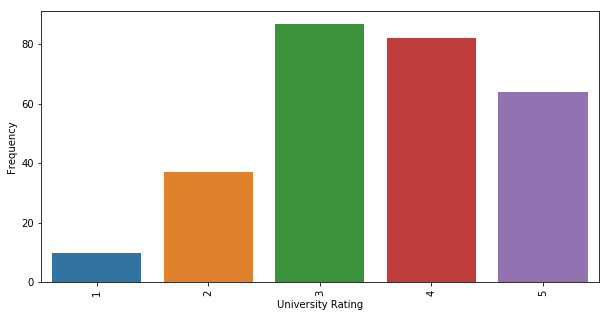

In [10]:
plt.figure(figsize=(10,5))
research_predict=data_predict[data_predict['Research']==1.0].groupby('University Rating')['University Rating'].count()
research_predict=research_predict.sort_values(ascending=True)
sns.barplot(x=research_predict.index,y=research_predict.values)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

From the figure, we can deduce that there are larger applicants with reseach experience applying to University with rating 3,4,5 as compared to 1 and 2. This is obvious from the fact that universities with good rating demand research experience

In [20]:
research_predict_with_research = data_predict[data_predict['Research']==1.0].groupby('University Rating').count()

In [21]:
research_predict_with_out_research = data_predict[data_predict['Research']==0.0].groupby('University Rating').count()

In [24]:
research_predict_with_research 

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,,
1,10,10,10,10,10,10,10,10
2,37,37,37,37,37,37,37,37
3,87,87,87,87,87,87,87,87
4,82,82,82,82,82,82,82,82
5,64,64,64,64,64,64,64,64


In [26]:
research_predict_with_research['University Rating'] = research_predict_with_research.index

In [33]:
research_predict_with_research = research_predict_with_research.reset_index(drop=True)

In [34]:
research_predict_with_research['whether Research done'] = 1

In [35]:
research_predict_with_research

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit,University Rating,whether Research done
0,10,10,10,10,10,10,10,10,1,1
1,37,37,37,37,37,37,37,37,2,1
2,87,87,87,87,87,87,87,87,3,1
3,82,82,82,82,82,82,82,82,4,1
4,64,64,64,64,64,64,64,64,5,1


In [36]:
research_predict_with_out_research

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,,
1,24,24,24,24,24,24,24,24
2,89,89,89,89,89,89,89,89
3,75,75,75,75,75,75,75,75
4,23,23,23,23,23,23,23,23
5,9,9,9,9,9,9,9,9


In [37]:
research_predict_with_out_research['University Rating'] = research_predict_with_out_research.index
research_predict_with_out_research = research_predict_with_out_research.reset_index(drop=True)
research_predict_with_out_research['whether Research done'] = 0

In [38]:
research_predict_with_out_research

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit,University Rating,whether Research done
0,24,24,24,24,24,24,24,24,1,0
1,89,89,89,89,89,89,89,89,2,0
2,75,75,75,75,75,75,75,75,3,0
3,23,23,23,23,23,23,23,23,4,0
4,9,9,9,9,9,9,9,9,5,0


In [41]:
df1 = research_predict_with_research[['Research','University Rating', 'whether Research done']]

In [42]:
df2 = research_predict_with_out_research[['Research','University Rating', 'whether Research done']]

In [47]:
final_df= pd.concat([df1, df2])

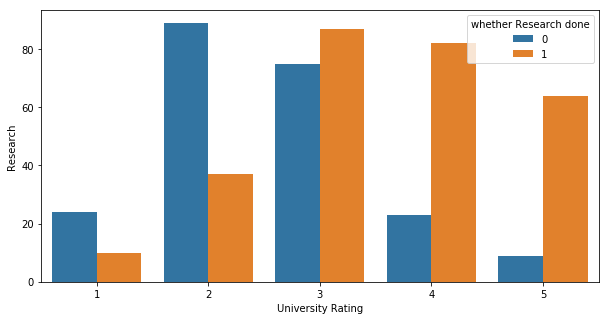

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x=final_df['University Rating'],y=final_df['Research'],hue=final_df['whether Research done'])

We can see from the graph that the difference between candidates with research experience and candidates without research experience incearse significantly as the rating of university increases.
The no of candidates with no research experience is the highest for university with rating 2. This number drops significantly as the rating of the university increases

C:\Users\E6420\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


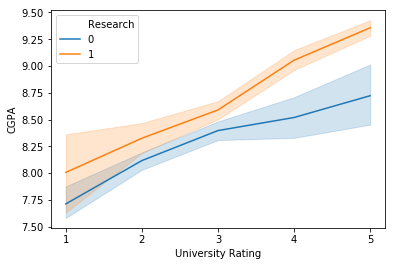

In [53]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Plot the responses for different events and regions
ax = sns.lineplot(y="CGPA", x="University Rating",
             hue="Research",data=data_predict)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

This indicates that as the rating of the university increases, the difference between CGPA of the candidates with research experience and without research experience increases significantly. We can also see that the difference between the CGPA bewteen candidates is constant till 3. Then this difference starts to increase. This is consistant with the fact that people with good IQ tend to apply to better universities 

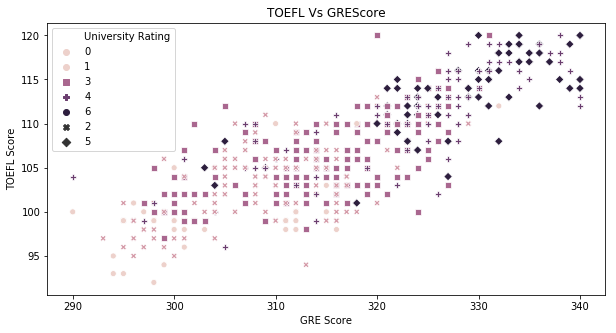

In [61]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='GRE Score',y='TOEFL Score',data=data_predict,hue = 'University Rating', style = 'University Rating' )
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.title('TOEFL Vs GREScore')
plt.show()

From the figure, one can see that for University Ratings 2 and 3 we need an GRE score of around 300- 320. While the TOEFL score 97 to 110. But for University Ratings 4 and 5, we need a GRE score of atleast 320 and TOEFL score of 100. This coincides with the minimum requirements of GRE and TOEFL for universities. Universities with good ratings tend to have high requirements of GRE and TOEFL score.

Text(0.5,0,'Chance of Admit')

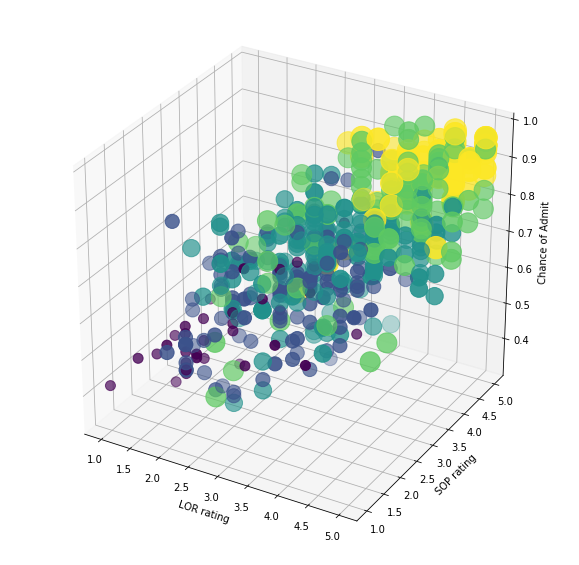

In [89]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(data_predict['LOR '], data_predict['SOP'], data_predict['Chance of Admit '], c= data_predict['University Rating'], s= data_predict['University Rating']*100, marker='o')

ax2.set_xlabel('LOR rating')
ax2.set_ylabel('SOP rating')
ax2.set_zlabel('Chance of Admit')


Here We can see that the size and color of the circle is indicative of the university rating. From the graph we can see that we need a strong LOR and SOP score in order to get into university of rating 4 or 5. This dataset is also indicative of the fact that student with strong LOR and SOP must apply to universities with rating 4 and 5 as the chances of admit is high